In [1]:
# activate R magic
%load_ext rpy2.ipython

In [2]:
! pwd

/home/rstudio/datavizclaus/selectedfigures


R[write to console]: Loading required package: cowplot

R[write to console]: Loading required package: colorspace

R[write to console]: Loading required package: colorblindr

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘dviz.supp’


R[write to console]: The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


R[write to console]: The following object is masked from ‘package:datasets’:

    CO2


R[write to console]: 
Attaching package: ‘ggridges’


R[write to console]: The following object is masked from ‘package:dviz.supp’:

    Aus_athletes




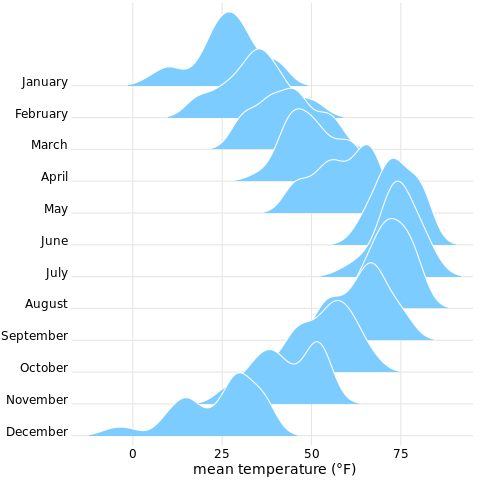

In [3]:
%%R
source("../_common.R")

library(forcats)
library(ggridges)

lincoln_weather %>%
  mutate(
	month_short = fct_recode(
  	Month,
  	Jan = "January",
  	Feb = "February",
  	Mar = "March",
  	Apr = "April",
  	May = "May",
  	Jun = "June",
  	Jul = "July",
  	Aug = "August",
  	Sep = "September",
  	Oct = "October",
  	Nov = "November",
  	Dec = "December"
	)
  ) %>%
  mutate(month_short = fct_rev(month_short)) -> lincoln_df

bandwidth <- 3.4

ggplot(lincoln_df, aes(x = `Mean Temperature [F]`, y = `Month`)) +
  geom_density_ridges(
	scale = 3, rel_min_height = 0.01,
	bandwidth = bandwidth, fill = lighten("#56B4E9", .3), color = "white"
  ) +
  scale_x_continuous(
	name = "mean temperature (°F)",
	expand = c(0, 0), breaks = c(0, 25, 50, 75)
  ) +
  scale_y_discrete(name = NULL, expand = c(0, .2, 0, 2.6)) +
  theme_dviz_grid() +
  theme(
	axis.text.y = element_text(vjust = 0),
	plot.margin = margin(3, 7, 3, 1.5)
  )
